In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/traffic.csv.zip')

In [ ]:
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [ ]:
data["DateTime"]= pd.to_datetime(data["DateTime"])
print(data.columns)
if 'id' in data.columns:
    data = data.drop(["id"], axis=1)
else:
    print("Column 'id' not found in the DataFrame")
data.info()

Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')
Column 'id' not found in the DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.5 MB


Text(0.5, 0, 'Date')

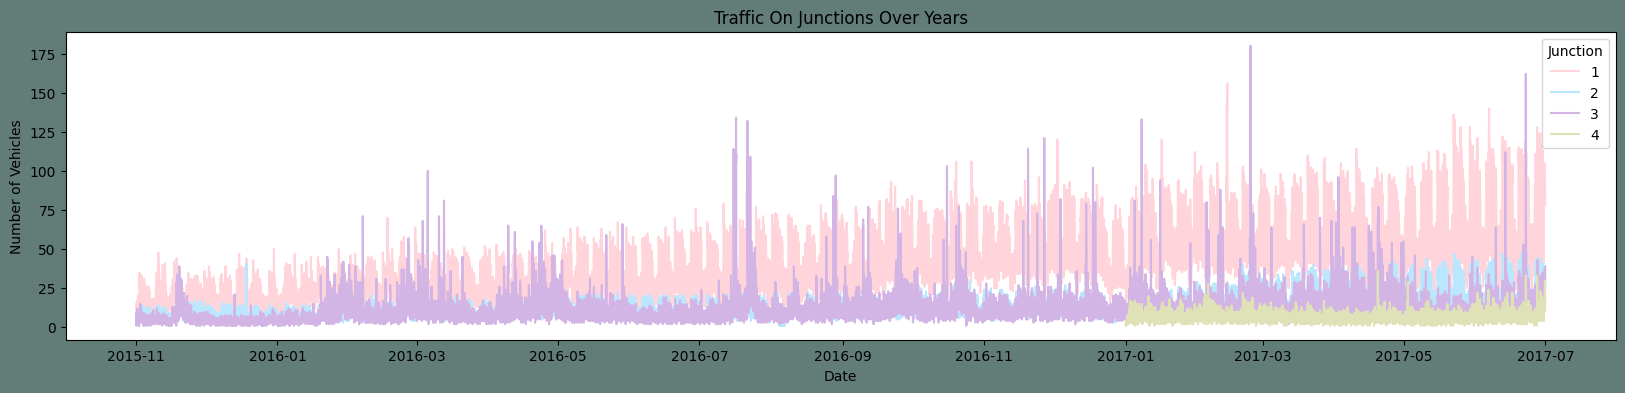

In [ ]:
#df to be used for EDA
df=data.copy()
#Let's plot the Timeseries
colors = [ "#FFD4DB","#BBE7FE","#D3B5E5","#dfe2b6"]
plt.figure(figsize=(20,4),facecolor="#627D78")
Time_series=sns.lineplot(x=df['DateTime'],y="Vehicles",data=df, hue="Junction", palette=colors)
Time_series.set_title("Traffic On Junctions Over Years")
Time_series.set_ylabel("Number of Vehicles")
Time_series.set_xlabel("Date")


In [ ]:


# Now you can continue with the rest of your code:
df["Year"]= df['DateTime'].dt.year
df["Month"]= df['DateTime'].dt.month
df["Date_no"]= df['DateTime'].dt.day
df["Hour"]= df['DateTime'].dt.hour
df["Day"]= df.DateTime.dt.strftime("%A")  # Changed dg to dt
df.head()

,DateTime,Junction,Vehicles,ID,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,1,4,Sunday


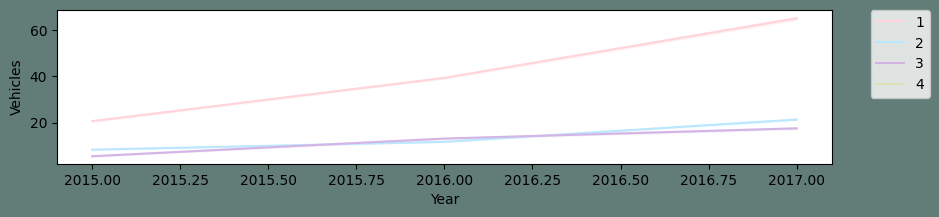

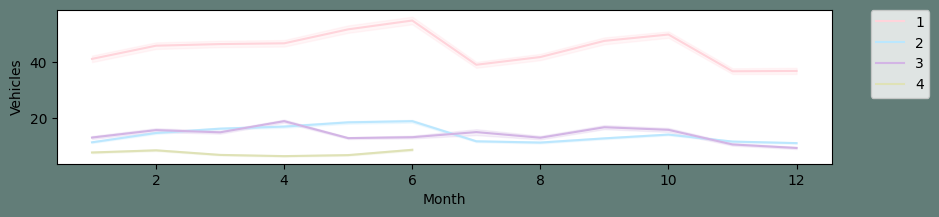

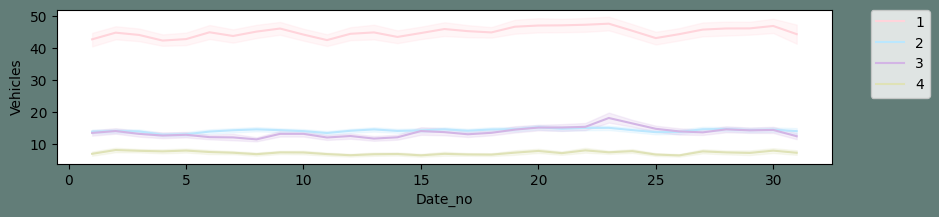

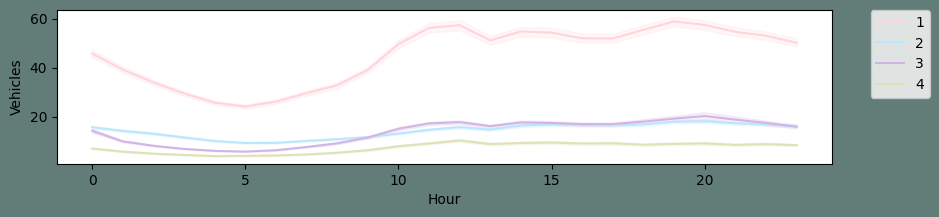

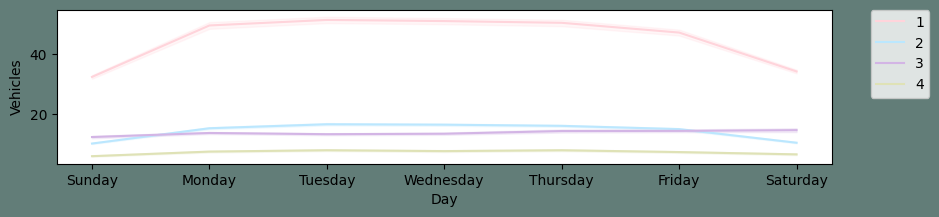

In [ ]:
#Let's plot the Timeseries
new_features = [ "Year","Month", "Date_no", "Hour", "Day"]

for i in new_features:
    plt.figure(figsize=(10,2),facecolor="#627D78")
    ax=sns.lineplot(x=df[i],y="Vehicles",data=df, hue="Junction", palette=colors )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


Text(0.5, 0, 'Date')

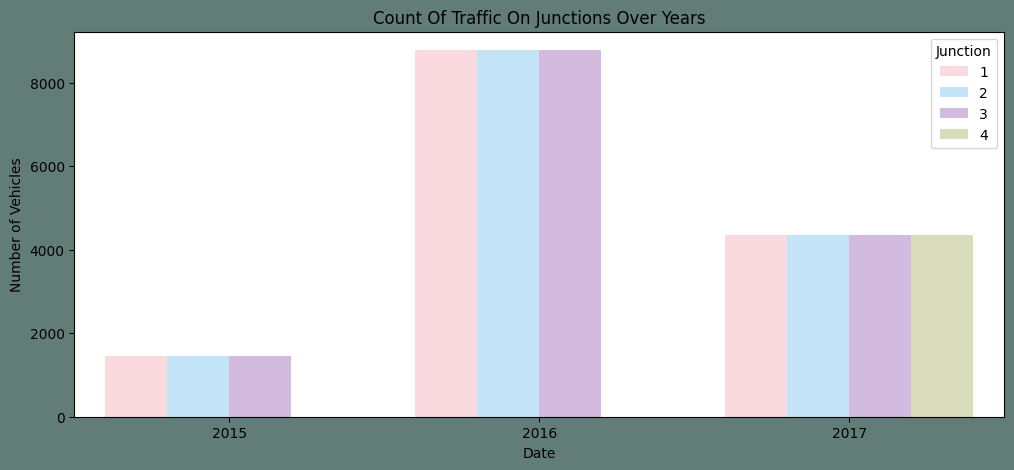

In [ ]:
plt.figure(figsize=(12,5),facecolor="#627D78")
count = sns.countplot(data=df, x =df["Year"], hue="Junction", palette=colors)
count.set_title("Count Of Traffic On Junctions Over Years")
count.set_ylabel("Number of Vehicles")
count.set_xlabel("Date")


<Axes: >

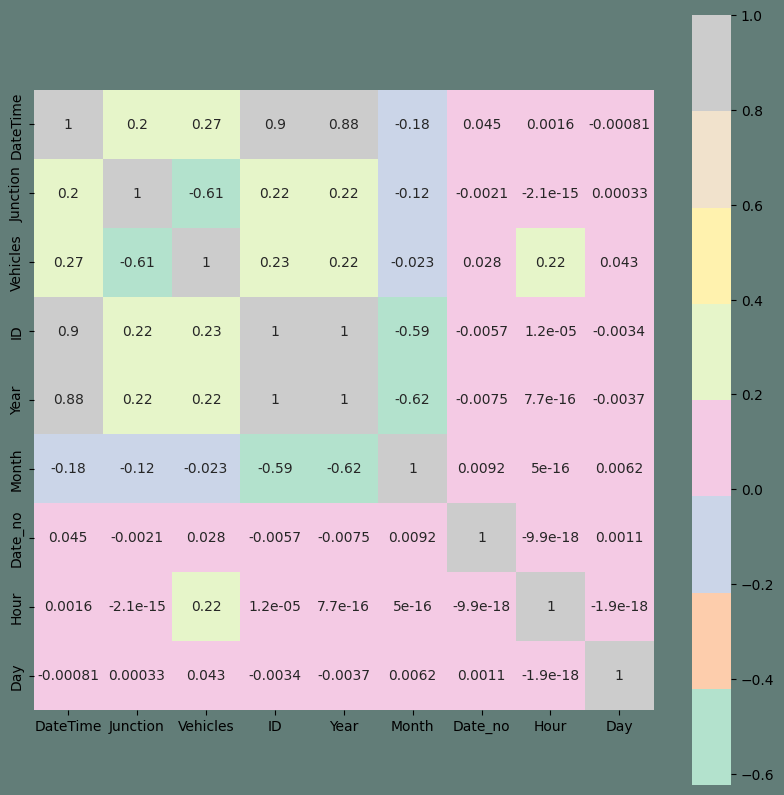

In [ ]:
# Convert 'Day' column to categorical and then to numeric representation
df['Day'] = pd.Categorical(df['Day']).codes

# Now calculate the correlation matrix
corrmat = df.corr()
plt.subplots(figsize=(10, 10), facecolor="#627D78")
sns.heatmap(corrmat, cmap="Pastel2", annot=True, square=True)

KeyboardInterrupt: 

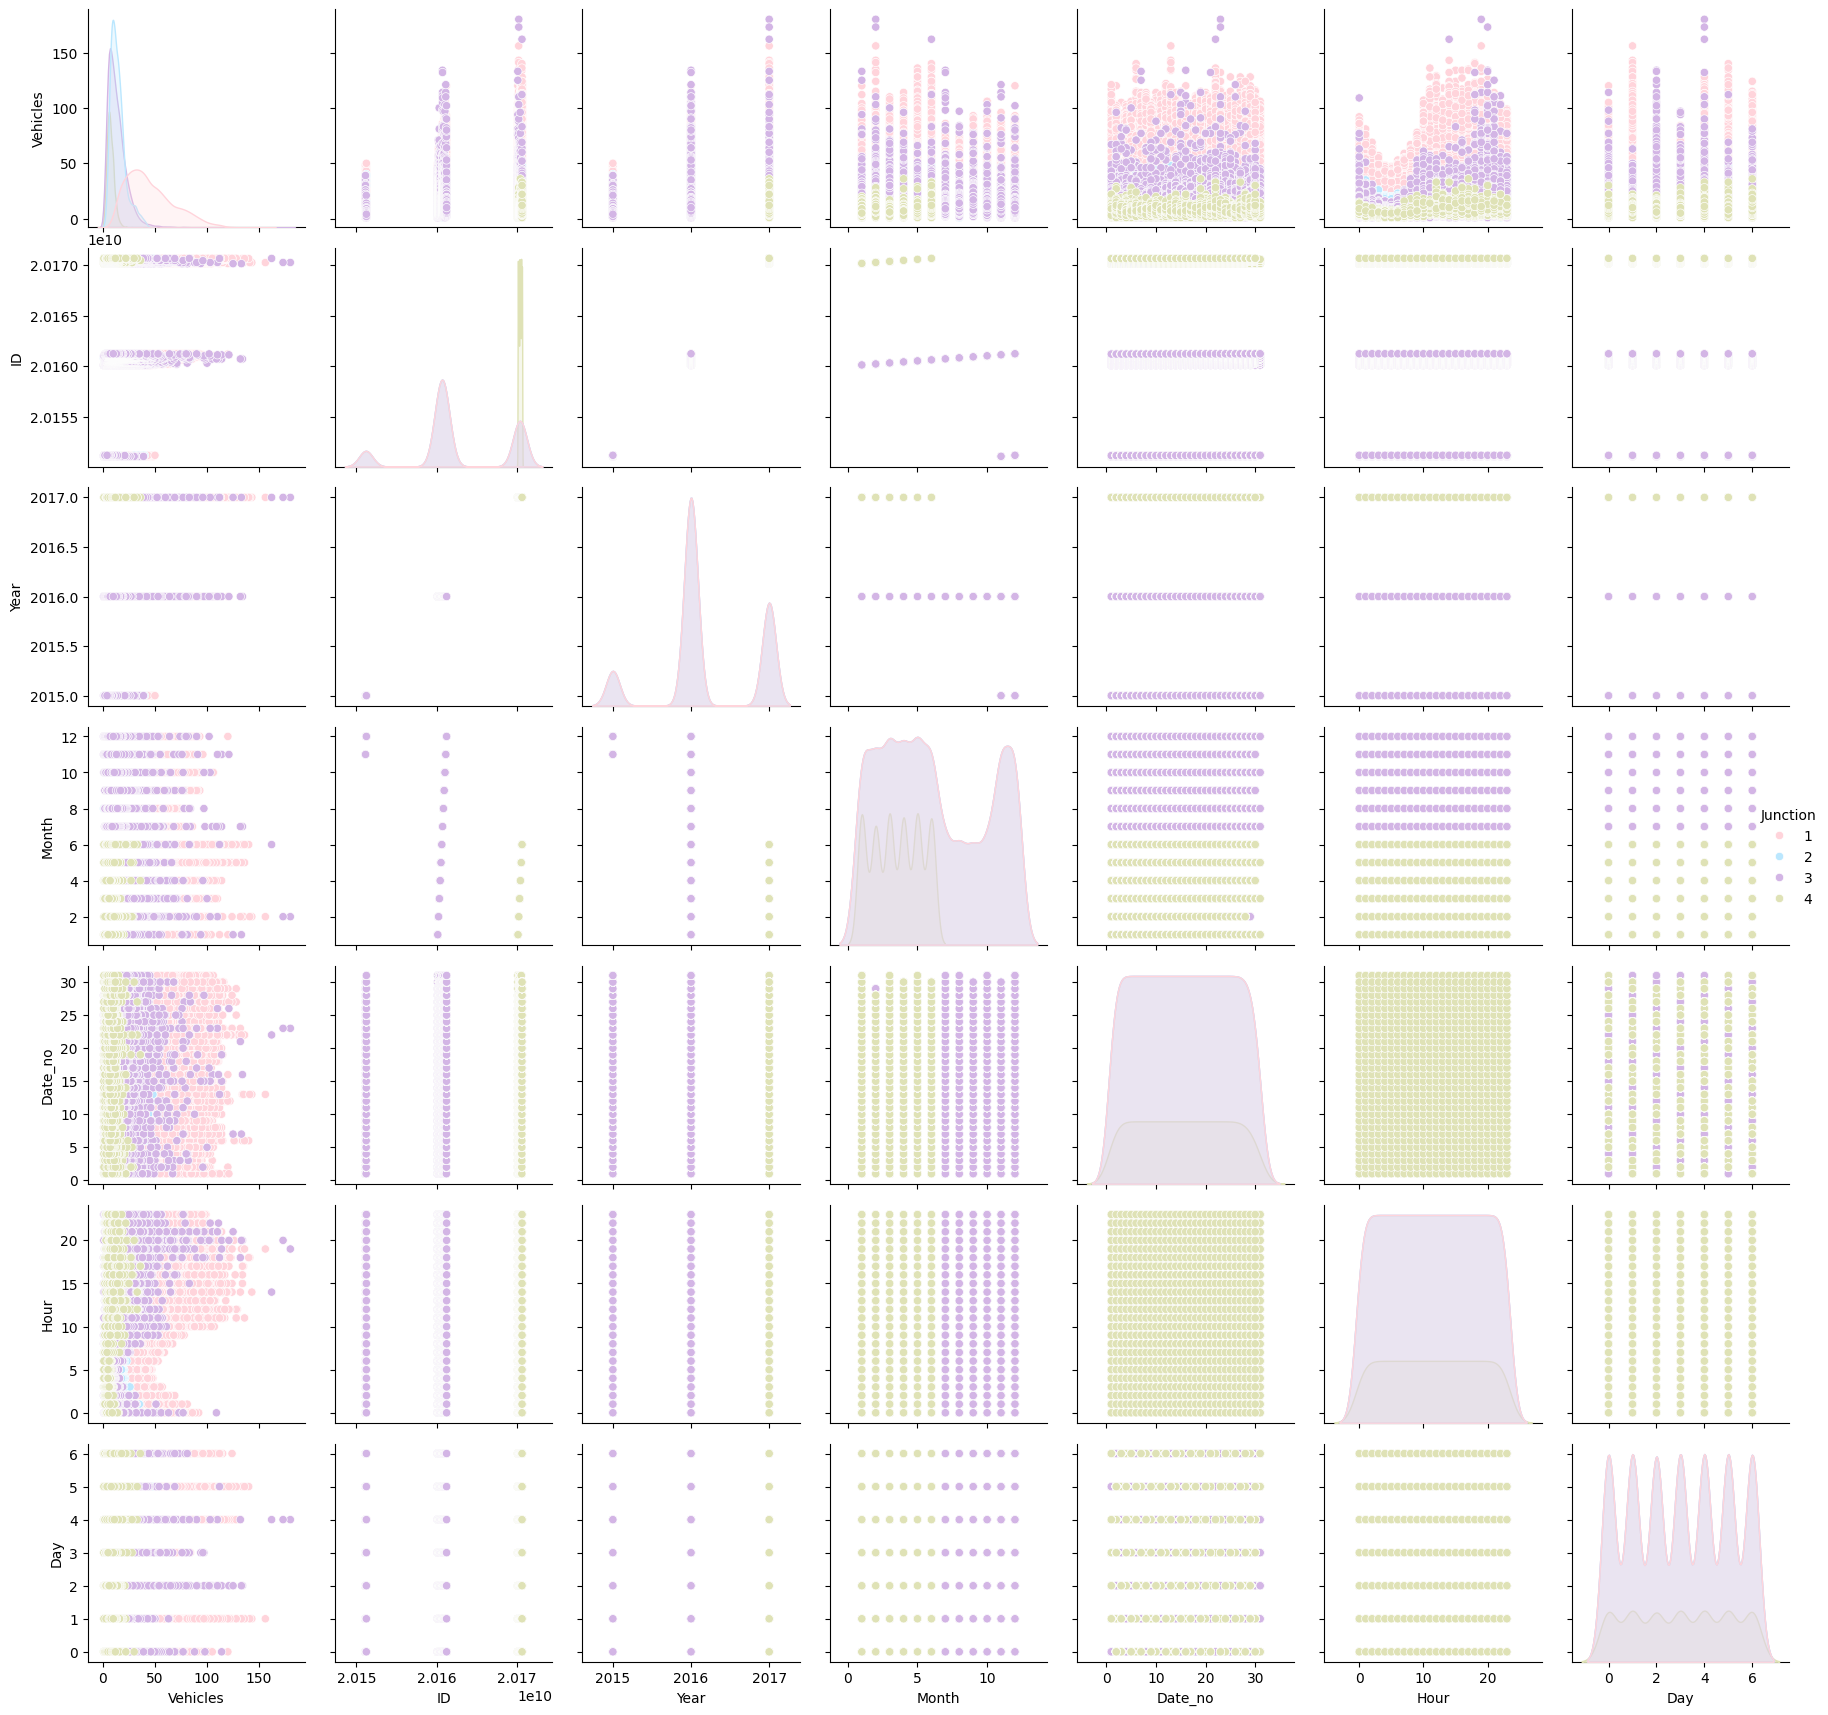

In [ ]:
sns.pairplot(data=df, hue= "Junction",palette=colors)


In [ ]:
#Pivoting data fron junction
df_J = data.pivot(columns="Junction", index="DateTime")
df_J.describe()


Vehicles                                                     ID  \
Junction             1             2             3            4             1   
count     14592.000000  14592.000000  14592.000000  4344.000000  1.459200e+04   
mean         45.052906     14.253221     13.694010     7.251611  2.016260e+10   
std          23.008345      7.401307     10.436005     3.521455  5.779594e+06   
min           5.000000      1.000000      1.000000     1.000000  2.015110e+10   
25%          27.000000      9.000000      7.000000     5.000000  2.016038e+10   
50%          40.000000     13.000000     11.000000     7.000000  2.016083e+10   
75%          59.000000     17.000000     18.000000     9.000000  2.017013e+10   
max         156.000000     48.000000    180.000000    36.000000  2.017063e+10   

                                                    
Junction             2             3             4  
count     1.459200e+04  1.459200e+04  4.344000e+03  
mean      2.016260e+10  2.016260e+10  2.017037e+10  
std       5.779594e+06  5.779594e+06  1.712987e+05  
min       2.015110e+10  2.015110e+10  2.017010e+10  
25%       2.016038e+10  2.016038e+10  2.017022e+10  
50%       2.016083e+10  2.016083e+10  2.017040e+10  
75%       2.017013e+10  2.017013e+10  2.017052e+10  
max       2.017063e+10  2.017063e+10  2.017063e+10

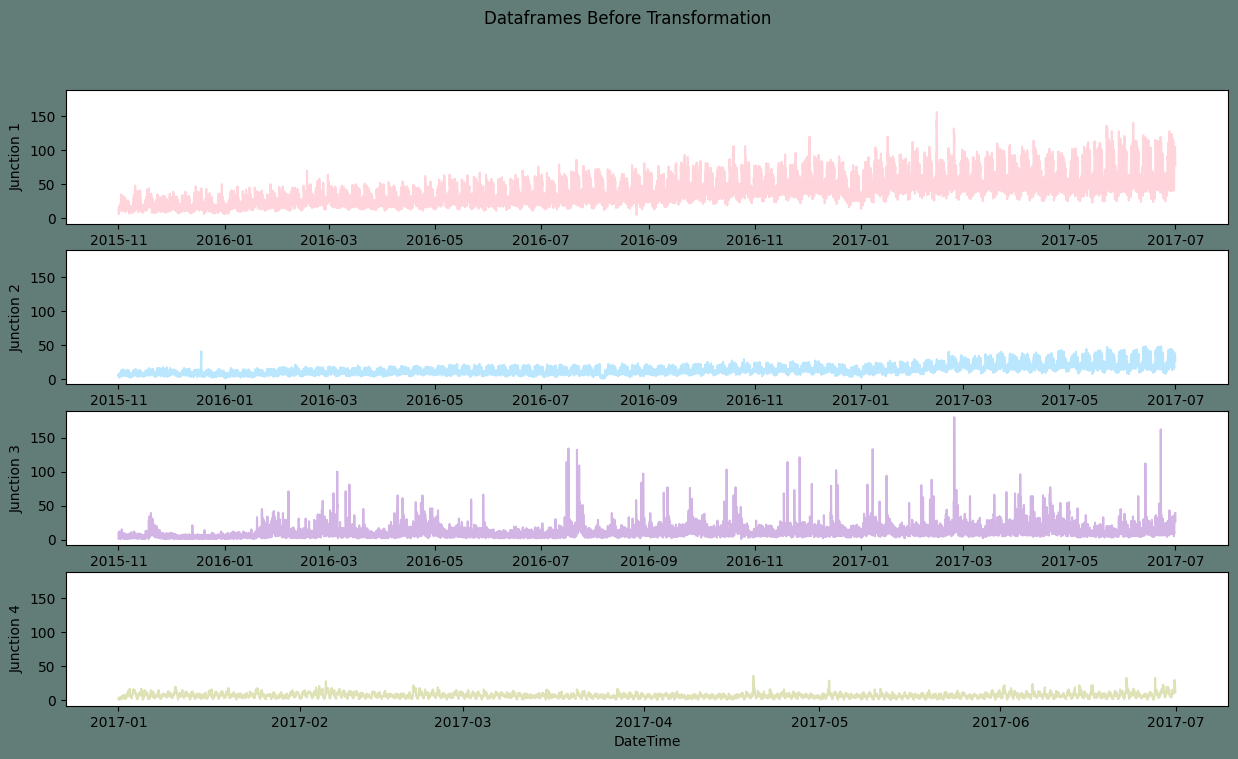

In [ ]:
#Creating new sets
df_1 = df_J[[('Vehicles', 1)]]
df_2 = df_J[[('Vehicles', 2)]]
df_3 = df_J[[('Vehicles', 3)]]
df_4 = df_J[[('Vehicles', 4)]]
df_4 = df_4.dropna() #Junction 4 has limited data only for a few months

#Dropping level one in dfs's index as it is a multi index data frame
list_dfs = [df_1, df_2, df_3, df_4]
for i in list_dfs:
    i.columns= i.columns.droplevel(level=1)

#Function to plot comparitive plots of dataframes
def Sub_Plots4(df_1, df_2,df_3,df_4,title):
    fig, axes = plt.subplots(4, 1, figsize=(15, 8),facecolor="#627D78", sharey=True)
    fig.suptitle(title)
    #J1
    pl_1=sns.lineplot(ax=axes[0],data=df_1,color=colors[0])
    #pl_1=plt.ylabel()
    axes[0].set(ylabel ="Junction 1")
    #J2
    pl_2=sns.lineplot(ax=axes[1],data=df_2,color=colors[1])
    axes[1].set(ylabel ="Junction 2")
    #J3
    pl_3=sns.lineplot(ax=axes[2],data=df_3,color=colors[2])
    axes[2].set(ylabel ="Junction 3")
    #J4
    pl_4=sns.lineplot(ax=axes[3],data=df_4,color=colors[3])
    axes[3].set(ylabel ="Junction 4")


#Plotting the dataframe to check for stationarity
Sub_Plots4(df_1.Vehicles, df_2.Vehicles,df_3.Vehicles,df_4.Vehicles,"Dataframes Before Transformation")


In [ ]:
# Normalize Function
def Normalize(df,col):
    average = df[col].mean()
    stdev = df[col].std()
    df_normalized = (df[col] - average) / stdev
    df_normalized = df_normalized.to_frame()
    return df_normalized, average, stdev

# Differencing Function
def Difference(df,col, interval):
    diff = []
    for i in range(interval, len(df)):
        value = df[col][i] - df[col][i - interval]
        diff.append(value)
    return diff


In [ ]:
#Normalizing and Differencing to make the series stationary
df_N1, av_J1, std_J1 = Normalize(df_1, "Vehicles")
Diff_1 = Difference(df_N1, col="Vehicles", interval=(24*7)) #taking a week's diffrence
df_N1 = df_N1[24*7:]
df_N1.columns = ["Norm"]
df_N1["Diff"]= Diff_1

df_N2, av_J2, std_J2 = Normalize(df_2, "Vehicles")
Diff_2 = Difference(df_N2, col="Vehicles", interval=(24)) #taking a day's diffrence
df_N2 = df_N2[24:]
df_N2.columns = ["Norm"]
df_N2["Diff"]= Diff_2

df_N3, av_J3, std_J3 = Normalize(df_3, "Vehicles")
Diff_3 = Difference(df_N3, col="Vehicles", interval=1) #taking an hour's diffrence
df_N3 = df_N3[1:]
df_N3.columns = ["Norm"]
df_N3["Diff"]= Diff_3

df_N4, av_J4, std_J4 = Normalize(df_4, "Vehicles")
Diff_4 = Difference(df_N4, col="Vehicles", interval=1) #taking an hour's diffrence
df_N4 = df_N4[1:]
df_N4.columns = ["Norm"]
df_N4["Diff"]= Diff_4


<ipython-input-71-336864d135dc>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = df[col][i] - df[col][i - interval]
<ipython-input-72-51063ce89974>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_N1["Diff"]= Diff_1
<ipython-input-71-336864d135dc>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = df[col][i] - df[col][i - interval]
<ipython-input-72-51063ce89

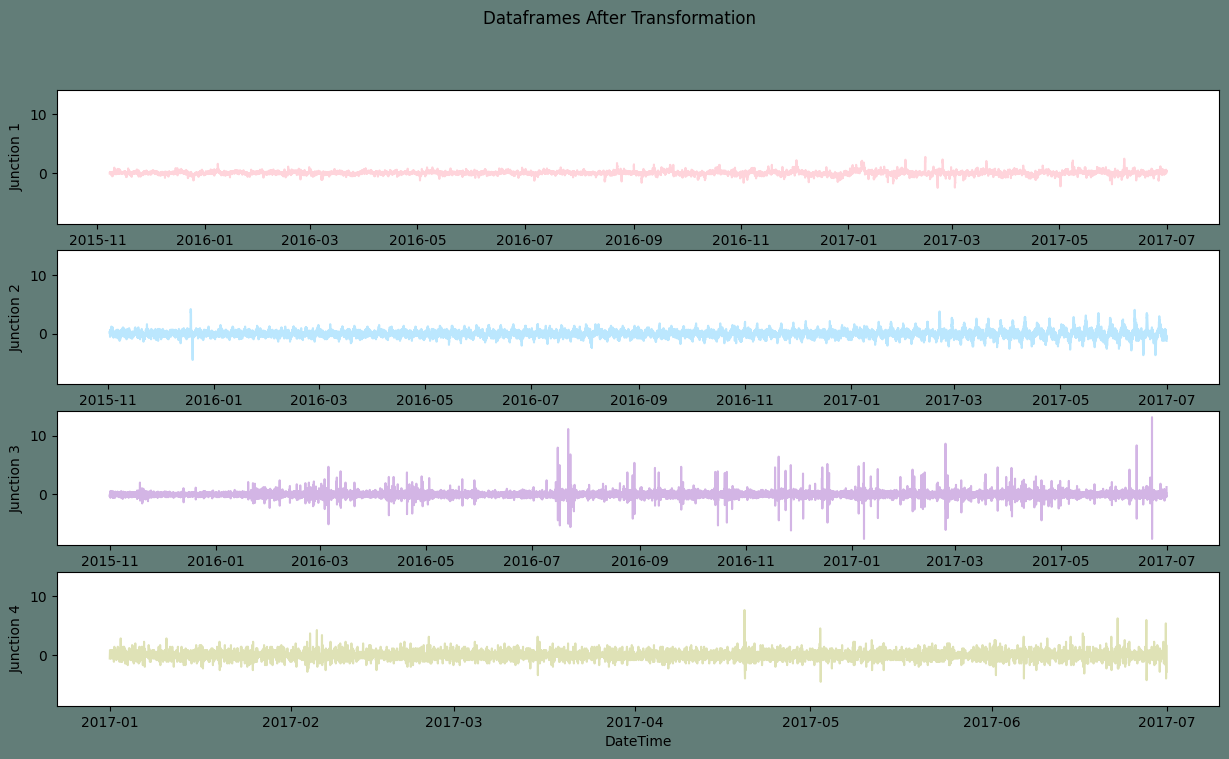

In [ ]:
Sub_Plots4(df_N1.Diff, df_N2.Diff,df_N3.Diff,df_N4.Diff,"Dataframes After Transformation")


In [ ]:
#Stationary Check for the time series Augmented Dickey Fuller test
!pip install statsmodels
from statsmodels.tsa.stattools import adfuller

def Stationary_check(df):
    check = adfuller(df.dropna())
    print(f"ADF Statistic: {check[0]}")
    print(f"p-value: {check[1]}")
    print("Critical Values:")
    for key, value in check[4].items():
        print('\t%s: %.3f' % (key, value))
    if check[0] > check[4]["1%"]:
        print("Time Series is Non-Stationary")
    else:
        print("Time Series is Stationary")


#Checking if the series is stationary

List_df_ND = [ df_N1["Diff"], df_N2["Diff"], df_N3["Diff"], df_N4["Diff"]]
print("Checking the transformed series for stationarity:")
for i in List_df_ND:
    print("\n")
    Stationary_check(i)

Checking the transformed series for stationarity:


ADF Statistic: -15.265303390415434
p-value: 4.798539876396819e-28
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -21.795891026940144
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -28.001759908832977
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -17.979092563052305
p-value: 2.7787875325953405e-30
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Time Series is Stationary


In [ ]:
#Differencing created some NA values as we took a weeks data into consideration while difrencing
df_J1 = df_N1["Diff"].dropna()
df_J1 = df_J1.to_frame()

df_J2 = df_N2["Diff"].dropna()
df_J2 = df_J2.to_frame()

df_J3 = df_N3["Diff"].dropna()
df_J3 = df_J3.to_frame()

df_J4 = df_N4["Diff"].dropna()
df_J4 = df_J4.to_frame()

#Splitting the dataset
def Split_data(df):
    training_size = int(len(df)*0.90)
    data_len = len(df)
    train, test = df[0:training_size],df[training_size:data_len]
    train, test = train.values.reshape(-1, 1), test.values.reshape(-1, 1)
    return train, test
#Splitting the training and test datasets
J1_train, J1_test = Split_data(df_J1)
J2_train, J2_test = Split_data(df_J2)
J3_train, J3_test = Split_data(df_J3)
J4_train, J4_test = Split_data(df_J4)

#Target and Feature
def TnF(df):
    end_len = len(df)
    X = []
    y = []
    steps = 32
    for i in range(steps, end_len):
        X.append(df[i - steps:i, 0])
        y.append(df[i, 0])
    X, y = np.array(X), np.array(y)
    return X ,y

#fixing the shape of X_test and X_train
def FeatureFixShape(train, test):
    train = np.reshape(train, (train.shape[0], train.shape[1], 1))
    test = np.reshape(test, (test.shape[0],test.shape[1],1))
    return train, test

#Assigning features and target
X_trainJ1, y_trainJ1 = TnF(J1_train)
X_testJ1, y_testJ1 = TnF(J1_test)
X_trainJ1, X_testJ1 = FeatureFixShape(X_trainJ1, X_testJ1)

X_trainJ2, y_trainJ2 = TnF(J2_train)
X_testJ2, y_testJ2 = TnF(J2_test)
X_trainJ2, X_testJ2 = FeatureFixShape(X_trainJ2, X_testJ2)

X_trainJ3, y_trainJ3 = TnF(J3_train)
X_testJ3, y_testJ3 = TnF(J3_test)
X_trainJ3, X_testJ3 = FeatureFixShape(X_trainJ3, X_testJ3)

X_trainJ4, y_trainJ4 = TnF(J4_train)
X_testJ4, y_testJ4 = TnF(J4_test)
X_trainJ4, X_testJ4 = FeatureFixShape(X_trainJ4, X_testJ4)



In [ ]:
!pip install tensorflow

import numpy as np
import tensorflow as tf

def GRU_model(X_train, y_train, X_test):
    """
    Builds and trains a GRU model for time series prediction.

    Args:
        X_train: Training features.
        y_train: Training target.
        X_test: Testing features.

    Returns:
        Predictions on the test set.
    """
    # Define the GRU model
    model = tf.keras.Sequential([
        tf.keras.layers.GRU(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.GRU(50, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    # Compile the model
    model.compile(loss='mse', optimizer='adam')

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1) # Reduced epochs for faster execution

    # Make predictions
    predictions = model.predict(X_test)

    return predictions


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


405/405 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - loss: 0.0522
Epoch 2/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 0.0438
Epoch 3/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - loss: 0.0461
Epoch 4/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - loss: 0.0417
Epoch 5/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - loss: 0.0429
Epoch 6/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 0.0434
Epoch 7/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0424
Epoch 8/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0450
Epoch 9/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - loss: 0.0424
Epoch 10/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - loss: 0.0435
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


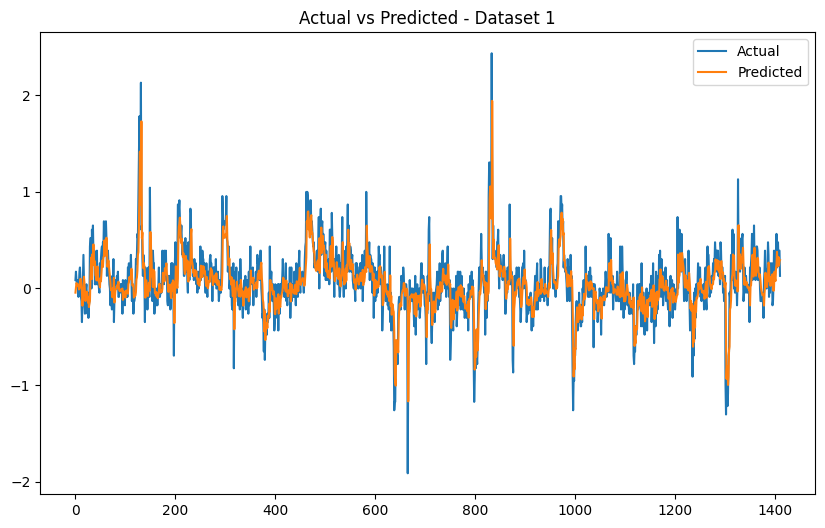

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install tensorflow

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


# Assuming RMSE_Value function is intended to calculate Root Mean Squared Error
def RMSE_Value(actual, predicted):
    """
    Calculates the Root Mean Squared Error (RMSE) between actual and predicted values.

    Args:
        actual: Actual values.
        predicted: Predicted values.

    Returns:
        The RMSE value.
    """
    return np.sqrt(np.mean((actual - predicted)**2))


# Assuming PredictionsPlot function is intended to plot actual vs predicted values
def PredictionsPlot(actual, predicted, index):
    """
    Plots the actual and predicted values.

    Args:
        actual: Actual values.
        predicted: Predicted values.
        index: Index for plot title.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(actual, label='Actual')
    plt.plot(predicted, label='Predicted')
    plt.title(f'Actual vs Predicted - Dataset {index + 1}')
    plt.legend()
    plt.show()


# Assuming PredJ1 is the prediction result from the GRU model for dataset J1
PredJ1 = GRU_model(X_trainJ1, y_trainJ1, X_testJ1)

#Results for J1
RMSE_J1 = RMSE_Value(y_testJ1, PredJ1)
PredictionsPlot(y_testJ1, PredJ1, 0)

In [ ]:
#Predictions For Second Junction
PredJ2 = GRU_model(X_trainJ2,y_trainJ2,X_testJ2)


Epoch 1/10
409/409 ━━━━━━━━━━━━━━━━━━━━ 33s 51ms/step - loss: 0.2074
Epoch 2/10
409/409 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - loss: 0.1733
Epoch 3/10
409/409 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - loss: 0.1697
Epoch 4/10
409/409 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - loss: 0.1746
Epoch 5/10
409/409 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - loss: 0.1689
Epoch 6/10
409/409 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - loss: 0.1759
Epoch 7/10
409/409 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - loss: 0.1674
Epoch 8/10
409/409 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - loss: 0.1664
Epoch 9/10
409/409 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - loss: 0.1673
Epoch 10/10
409/409 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - loss: 0.1641
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step


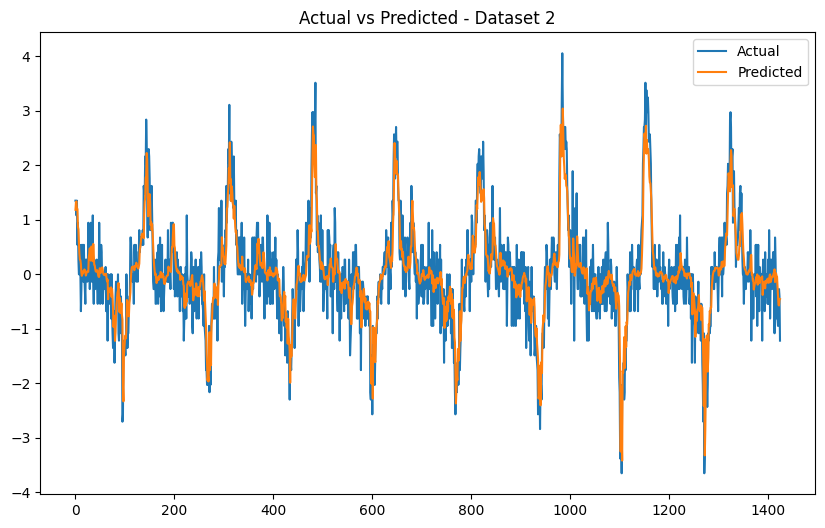

In [ ]:
#Results for J2
RMSE_J2=RMSE_Value(y_testJ2,PredJ2)
PredictionsPlot(y_testJ2,PredJ2,1)


In [ ]:
#Predictions For Third Junction
PredJ3 = GRU_model(X_trainJ3,y_trainJ3,X_testJ3)


Epoch 1/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - loss: 0.2772
Epoch 2/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - loss: 0.2587
Epoch 3/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - loss: 0.2703
Epoch 4/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - loss: 0.2429
Epoch 5/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - loss: 0.2633
Epoch 6/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - loss: 0.2644
Epoch 7/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 0.2333
Epoch 8/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - loss: 0.2356
Epoch 9/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - loss: 0.2440
Epoch 10/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - loss: 0.2270
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


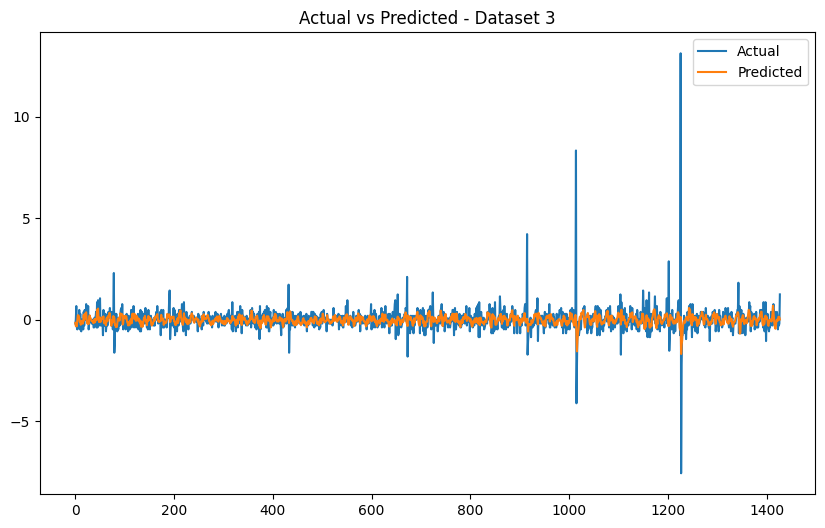

In [ ]:
#Results for J3
RMSE_J3=RMSE_Value(y_testJ3,PredJ3)
PredictionsPlot(y_testJ3,PredJ3,2)


In [ ]:
#Predictions For Forth Junction
PredJ4 = GRU_model(X_trainJ4,y_trainJ4,X_testJ4)


Epoch 1/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.6656
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.6431
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.5810
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.5336
Epoch 5/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.5700
Epoch 6/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.5732
Epoch 7/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.5294
Epoch 8/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.5543
Epoch 9/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.5046
Epoch 10/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.5475
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


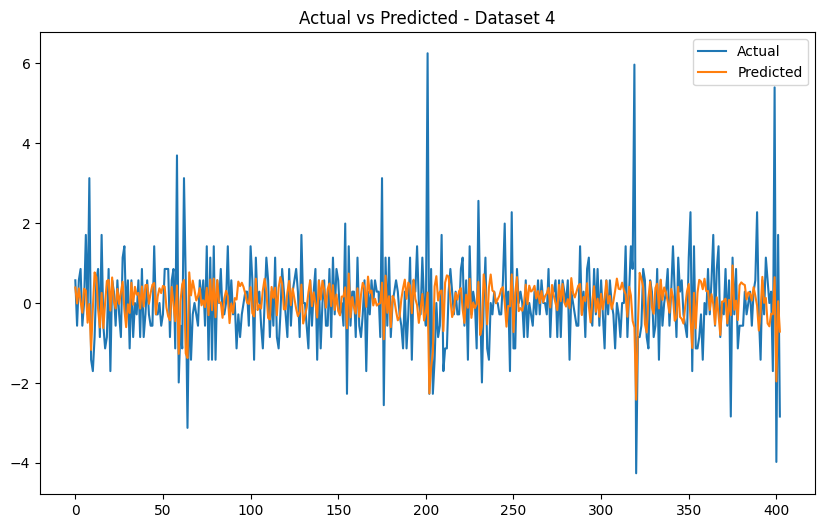

In [ ]:
#Results for J4
RMSE_J4=RMSE_Value(y_testJ4,PredJ4)
PredictionsPlot(y_testJ4,PredJ4,3)


In [ ]:
# Functions to inverse transforms and Plot comparitive plots
# invert differenced forecast
def inverse_difference(last_ob, value):
    inversed = value + last_ob
    return inversed
#Plotting the comparison
def Sub_Plots2(df_1, df_2,title,m):
    fig, axes = plt.subplots(1, 2, figsize=(18,4), sharey=True,facecolor="#627D78")
    fig.suptitle(title)

    pl_1=sns.lineplot(ax=axes[0],data=df_1,color=colors[m])
    axes[0].set(ylabel ="Prediction")

    pl_2=sns.lineplot(ax=axes[1],data=df_2["Vehicles"],color="#627D78")
    axes[1].set(ylabel ="Orignal")



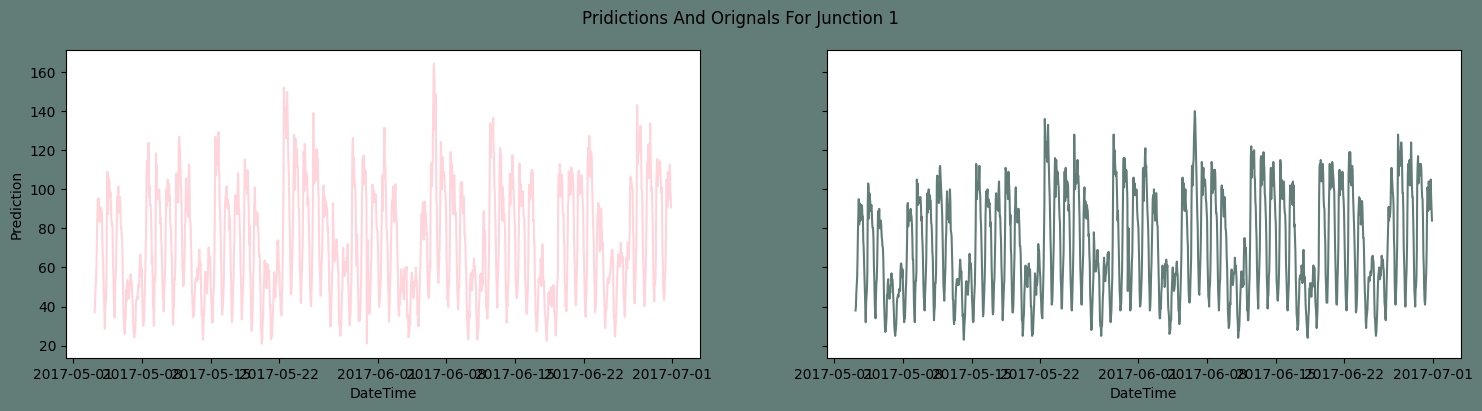

In [ ]:
# invert the differenced forecast for Junction 1
recover1 = df_N1.Norm[-1412:-1].to_frame()
recover1["Pred"]= PredJ1
Transform_reverssed_J1 = inverse_difference(recover1.Norm, recover1.Pred).to_frame()
Transform_reverssed_J1.columns = ["Pred_Normed"]
#Invert the normalizeation J1
Final_J1_Pred = (Transform_reverssed_J1.values* std_J1) + av_J1
Transform_reverssed_J1["Pred_Final"] =Final_J1_Pred
#Plotting the Predictions with orignals
Sub_Plots2(Transform_reverssed_J1["Pred_Final"], df_1[-1412:-1],"Pridictions And Orignals For Junction 1", 0)


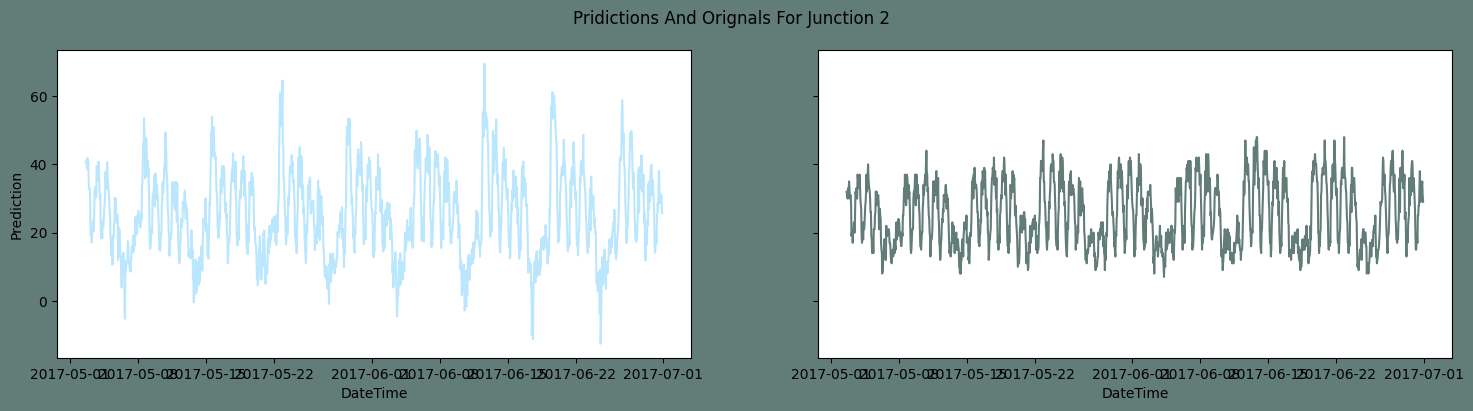

In [ ]:
#Invert the differenced J2
recover2 = df_N2.Norm[-1426:-1].to_frame() #len as per the diff
recover2["Pred"]= PredJ2
Transform_reverssed_J2 = inverse_difference(recover2.Norm, recover2.Pred).to_frame()
Transform_reverssed_J2.columns = ["Pred_Normed"]
Final_J2_Pred = (Transform_reverssed_J2.values* std_J2) + av_J2
Transform_reverssed_J2["Pred_Final"] =Final_J2_Pred
#Plotting the Predictions with orignals
Sub_Plots2(Transform_reverssed_J2["Pred_Final"], df_2[-1426:-1],"Pridictions And Orignals For Junction 2", 1)


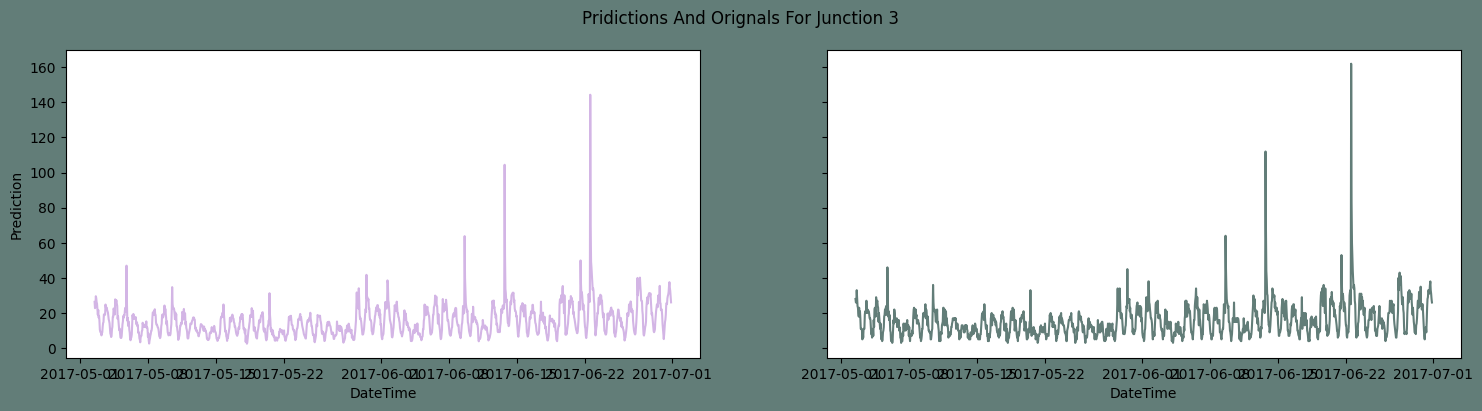

In [ ]:
#Invert the differenced J3
recover3 = df_N3.Norm[-1429:-1].to_frame() #len as per the diff
recover3["Pred"]= PredJ3
Transform_reverssed_J3 = inverse_difference(recover3.Norm, recover3.Pred).to_frame()
Transform_reverssed_J3.columns = ["Pred_Normed"]
#Invert the normalizeation J3
Final_J3_Pred = (Transform_reverssed_J3.values* std_J3) + av_J3
Transform_reverssed_J3["Pred_Final"] =Final_J3_Pred
Sub_Plots2(Transform_reverssed_J3["Pred_Final"], df_3[-1429:-1],"Pridictions And Orignals For Junction 3", 2)


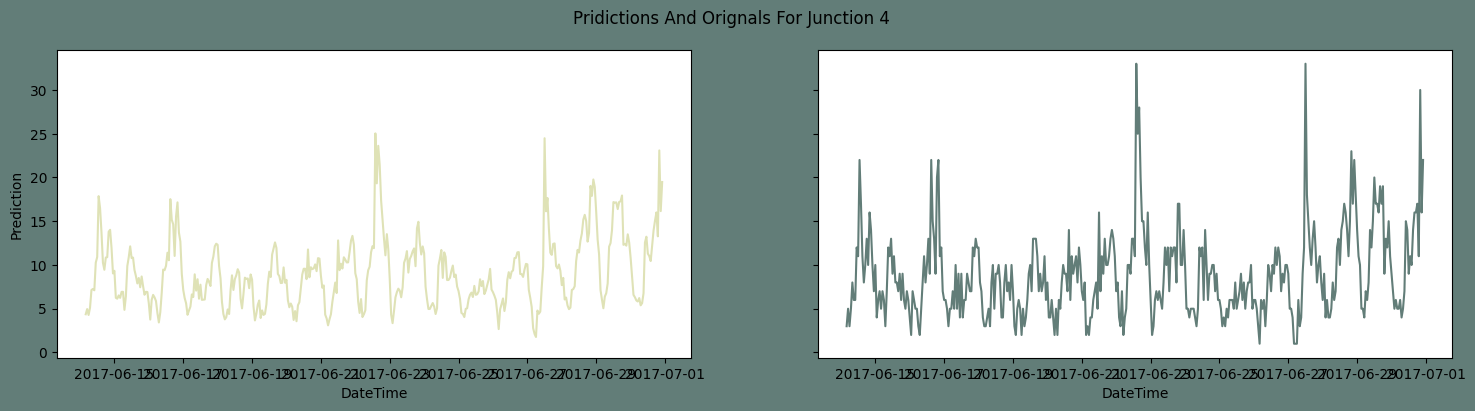

In [ ]:
#Invert the differenced J4
recover4 = df_N4.Norm[-404:-1].to_frame()  #len as per the testset
recover4["Pred"]= PredJ4
Transform_reverssed_J4 = inverse_difference(recover4.Norm, recover4.Pred).to_frame()
Transform_reverssed_J4.columns = ["Pred_Normed"]
#Invert the normalizeation J4
Final_J4_Pred = (Transform_reverssed_J4.values* std_J4) + av_J4
Transform_reverssed_J4["Pred_Final"] =Final_J4_Pred
Sub_Plots2(Transform_reverssed_J4["Pred_Final"], df_4[-404:-1],"Pridictions And Orignals For Junction 4", 3)
